***PROYECTO OFTALMOLOGIA***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

1. importación librerias y limpieza
4. Cargar y leer dataset
2. Estadisticas en columnas
3.


# 1 - **Librerias y Limpieza**

In [ ]:
#Importación de librerias y limpieza

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

#Importación de librerias y limpieza

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import display

dataset = pd.read_csv("/content/eye_health_population_dataset.csv") #La dirección se debe modificar
dataset.head()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import display

!Pip install  tensorflow

dataset = pd.read_csv("/content/eye_health_population_dataset.csv") #La dirección se debe modificar
dataset.head()


/bin/bash: line 1: Pip: command not found


,Patient_ID,Age,Gender,Eye,Refractive_Error,Intraocular_Pressure,Central_Corneal_Thickness,Pupil_Diameter,Visual_Acuity_logMAR,Astigmatism,Exam_Date,Age_Group
0,1,29.963210,Male,OS,-2.048977,11.816593,579.358665,4.915667,0.192444,No,2023-01-27 16:17:09.859468,Young Adult
1,2,76.057145,Female,OD,2.121844,19.499848,573.593040,2.721142,0.481434,No,2023-07-14 16:17:09.859468,Senior
2,3,58.559515,Female,OD,1.285175,17.352538,588.624944,3.881091,0.223226,No,2024-03-25 16:17:09.859468,Middle-Aged Adult
3,4,47.892679,Female,OD,1.772739,18.866494,577.963782,3.006269,0.472423,No,2023-01-12 16:17:09.859468,Middle-Aged Adult
4,5,12.481491,Female,OS,-0.519584,14.529853,596.812215,4.718337,0.184715,Yes,2023-04-28 16:17:09.859468,Senior


In [ ]:
#Ver últimas filas
dataset.tail()


,Patient_ID,Age,Gender,Eye,Refractive_Error,Intraocular_Pressure,Central_Corneal_Thickness,Pupil_Diameter,Visual_Acuity_logMAR,Astigmatism,Exam_Date,Age_Group
995,996,7.326566,Female,OD,-3.905193,13.028359,563.087088,6.407309,0.054290,Yes,2023-11-11 16:17:09.859468,Child
996,997,73.385086,Female,OS,0.944242,13.097786,511.497523,1.000000,0.388490,No,2023-07-21 16:17:09.859468,Senior
997,998,10.945490,Male,OD,-3.750264,17.084325,577.284031,6.322183,0.074039,No,2023-07-25 16:17:09.859468,Child
998,999,76.018988,Male,OS,0.872477,14.587631,549.378924,3.507829,0.500000,Yes,2023-10-25 16:17:09.859468,Senior
999,1000,35.680462,Male,OS,-2.296903,16.183748,551.911531,4.269808,0.133774,No,2023-09-13 16:17:09.859468,Young Adult


In [ ]:
#Ver Información
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 1000 non-null   int64  
 1   Age                        1000 non-null   float64
 2   Gender                     1000 non-null   object 
 3   Eye                        1000 non-null   object 
 4   Refractive_Error           1000 non-null   float64
 5   Intraocular_Pressure       1000 non-null   float64
 6   Central_Corneal_Thickness  1000 non-null   float64
 7   Pupil_Diameter             1000 non-null   float64
 8   Visual_Acuity_logMAR       1000 non-null   float64
 9   Astigmatism                1000 non-null   object 
 10  Exam_Date                  1000 non-null   object 
 11  Age_Group                  1000 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 93.9+ KB


In [ ]:
#Tamaño Filas y columnas
dataset.shape

(1000, 12)

In [ ]:
#Nombres en columnas
dataset.columns

Index(['Patient_ID', 'Age', 'Gender', 'Eye', 'Refractive_Error',
       'Intraocular_Pressure', 'Central_Corneal_Thickness', 'Pupil_Diameter',
       'Visual_Acuity_logMAR', 'Astigmatism', 'Exam_Date', 'Age_Group'],
      dtype='object')

In [ ]:
#datos perdidos
dataset.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Eye,0
Refractive_Error,0
Intraocular_Pressure,0
Central_Corneal_Thickness,0
Pupil_Diameter,0
Visual_Acuity_logMAR,0
Astigmatism,0


In [ ]:
#Conversión de datos a enteros
dataset["Age"] = dataset["Age"].astype(int)

# Convertir la columna 'Eye' a valores enteros
# OS (Ojo Izquierdo) -> 1, OD (Ojo Derecho) -> 2, NaN -> 0
dataset["Eye"] = dataset["Eye"].map({"OS": 1, "OD": 2}).fillna(0).astype(int)

# Eliminar la columna 'Patient_ID'
if 'Patient_ID' in dataset.columns:
    dataset.drop(columns=['Patient_ID'], inplace=True)
else:
    print("Column 'Patient_ID' not found in the DataFrame.")

# Eliminar la columna 'Astigmatism', 'Exam_Date
if 'Astigmatism' in dataset.columns:
    dataset.drop(columns=['Astigmatism'], inplace=True)
else:
    print("Column 'Astigmatism' not found in the DataFrame.")

if 'Exam_Date' in dataset.columns:
    dataset.drop(columns=['Exam_Date'], inplace=True)
else:
    print("Column 'Exam_Date' not found in the DataFrame.")


print(dataset.head())
#print(dataset.head())

   Age  Gender  Eye  Refractive_Error  Intraocular_Pressure  \
0   29    Male    1         -2.048977             11.816593   
1   76  Female    2          2.121844             19.499848   
2   58  Female    2          1.285175             17.352538   
3   47  Female    2          1.772739             18.866494   
4   12  Female    1         -0.519584             14.529853   

   Central_Corneal_Thickness  Pupil_Diameter  Visual_Acuity_logMAR  \
0                 579.358665        4.915667              0.192444   
1                 573.593040        2.721142              0.481434   
2                 588.624944        3.881091              0.223226   
3                 577.963782        3.006269              0.472423   
4                 596.812215        4.718337              0.184715   

           Age_Group  
0        Young Adult  
1             Senior  
2  Middle-Aged Adult  
3  Middle-Aged Adult  
4             Senior  


In [ ]:
dataset.head()

,Age,Gender,Eye,Refractive_Error,Intraocular_Pressure,Central_Corneal_Thickness,Pupil_Diameter,Visual_Acuity_logMAR,Age_Group
0,29,Male,1,-2.048977,11.816593,579.358665,4.915667,0.192444,Young Adult
1,76,Female,2,2.121844,19.499848,573.593040,2.721142,0.481434,Senior
2,58,Female,2,1.285175,17.352538,588.624944,3.881091,0.223226,Middle-Aged Adult
3,47,Female,2,1.772739,18.866494,577.963782,3.006269,0.472423,Middle-Aged Adult
4,12,Female,1,-0.519584,14.529853,596.812215,4.718337,0.184715,Senior


# 2 - **Visualización de datos**

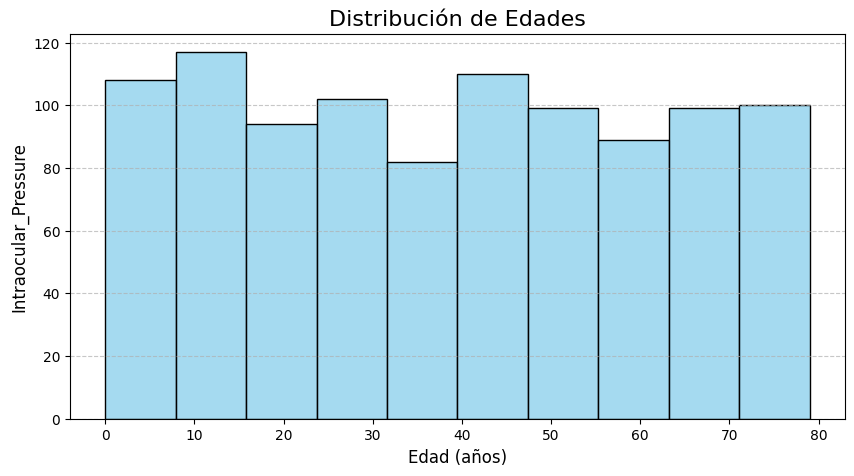

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras o histograma ?  ambos?
# Columnas a tomar? Columna1=Intraocular_pressure ; Columna2= Central_corneal

plt.figure(figsize=(10, 5))
sns.histplot(dataset["Age"], bins=10, kde=False, color="skyblue")
plt.title("Distribución de Edades", fontsize=16)
plt.xlabel("Edad (años)", fontsize=12)
plt.ylabel("Intraocular_Pressure", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Podemos evidenciar que se detecta una Presión Intraocular alta en una edad más temprana (0 a 16 años) seguido por una edad entre 39 y 47 años.En tercer lugar se presenta una presión Intraocular alta en el grupo de edad entre 24 a 31 años.

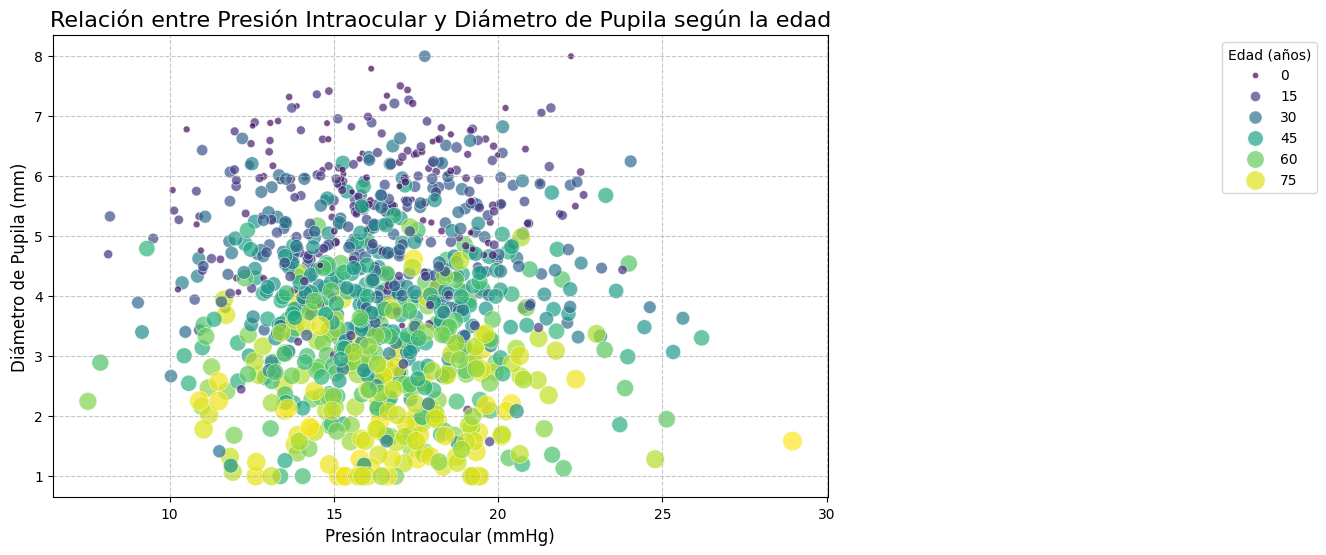

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=dataset["Intraocular_Pressure"],
    y=dataset["Pupil_Diameter"],
    size=dataset["Age"],
    hue=dataset["Age"],
    palette="viridis",
    sizes=(20, 200),
    alpha=0.7
)

plt.title("Relación entre Presión Intraocular y Diámetro de Pupila según la edad", fontsize=16)
plt.xlabel("Presión Intraocular (mmHg)", fontsize=12)
plt.ylabel("Diámetro de Pupila (mm)", fontsize=12)
plt.legend(title="Edad (años)", bbox_to_anchor=(1.5, 1), loc="upper left")
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

#Se evidencia una tendencia en relación a la edad. A menor edad (0-15 años) y una Presión en un rango normal, El diametro de la pupila tiende a ser mayor. Por el contrario, A mayor edad (60-75 años) la pupila es mas cerrada.

#Cuando un paciente tiene presión ocular alta, entre mayor sea la presión mayor es la dilatación de la pupila, lo cual representa un factor pronóstico de problema agudo y glaucoma grave 🚨 Urgencia 🚑

*Diametro de Pupila*

< 2,5 mm Pupila poco dilatada
2,5 a 5,5 mm de diámetro pupilar normal
 > 5,5 mm Pupila dilatada

*Presión Intraocular*

Presión muy Baja: < 7 mlt/mercurio | Hipotonía, no hay tono y fuerza, anomalía severa, ceguera
Presión Baja: (de 7 a 9.99) < 10 mlt/mercurio | Sospecha de anomalía
Presión normal: de 10 a 21 mlt/mercurio
Presión alta: > 21 mlt/mercurio | Hipertensión ocular, sospecha de glaucoma: causa daño al nervio óptico, pérdida de visión


In [ ]:
# Mapa de correlaciones ¿?
# Relación entre Intraocular_Pressure y Central_Corneal_Thickness	-> entre menor diametro de cornea mayor presion por ende mayor riesgo.
# Age  group y columna2 (Intraocular_Pressure y Pupil_Diameter)

dataset.head()

,Age,Gender,Eye,Refractive_Error,Intraocular_Pressure,Central_Corneal_Thickness,Pupil_Diameter,Visual_Acuity_logMAR,Age_Group
0,29,Male,1,-2.048977,11.816593,579.358665,4.915667,0.192444,Young Adult
1,76,Female,2,2.121844,19.499848,573.593040,2.721142,0.481434,Senior
2,58,Female,2,1.285175,17.352538,588.624944,3.881091,0.223226,Middle-Aged Adult
3,47,Female,2,1.772739,18.866494,577.963782,3.006269,0.472423,Middle-Aged Adult
4,12,Female,1,-0.519584,14.529853,596.812215,4.718337,0.184715,Senior


# **3 - Machine Learning**

Presión muy Baja: < 7 mlt/mercurio | Hipotonía, no hay tono y fuerza, anomalía severa, ceguera
Presión Baja: (de 7 a 9.99) < 10 mlt/mercurio | Sospecha de anomalía
Presión normal: de 10 a 21 mlt/mercurio
Presión alta: > 21 mlt/mercurio | Hipertensión ocular, sospecha de glaucoma: causa daño al nervio óptico, pérdida de visión
___
Rango bajo: < 500 micras Factor de riesgo para que el paciente desarrolle alta presión intraocular
Rango normal: 500 - 600 micras (0,001mm)
Rango alto: > 600 micras Grosor de cornea fuerte
___
< 2,5 mm Pupila poco dilatada
2,5 a 5,5 mm de diámetro pupilar normal
> 5,5 mm Pupila dilatada


In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


# Función para calcular el pronóstico basado en las reglas
def calcular_riesgo(row):
    if row["Intraocular_Pressure"] < 7:
        return 1  # Anomalia Severa : Hipotonía ocular
    elif row["Intraocular_Pressure"] < 10:
        return 2  # Sospecha de anomalia, entre 7 y 10
    elif row["Intraocular_Pressure"] > 10 < 21:
        return 3  # Pronostico normal
    elif row["Intraocular_Pressure"] > 21:
        return 4  # Sospecha de Glaucoma : Hipertensión ocular

    if row["Pupil_Diameter"] > 5.5:
        return 4  # Pupila muy dilatada: Sospecha de Glaucoma : Hipertensión ocular
    elif row["Pupil_Diameter"] <= 2.5:
        return 2  # Pupila muy cerrada : Sospecha de anomalia, entre 7 y 10
    elif row["Pupil_Diameter"] > 2.5 < 5.5:
        return 3  # Pupila normal : Pronostico normal

    if row["Central_Corneal_Thickness"] < 500:
        return 4  # Riesgo a Glaucoma : Hipertensión ocular
    elif row["Central_Corneal_Thickness"] >= 500 < 600:
        return 3  # Córnea dentro del rango normal

    return calcular_riesgo  # Bueno (sin riesgo)

# Simulación del dataset (puedes reemplazar esto con tu archivo real)
data = {
    "Age": np.random.randint(18, 80, 100),
    "Gender": np.random.choice(["Masculino", "Femenino"], 100),
    "Eye": np.random.choice(["OS", "OD"], 100),
    "Refractive_Error": np.random.uniform(-5, 5, 100),
    "Intraocular_Pressure": np.random.uniform(8, 25, 100),
    "Central_Corneal_Thickness": np.random.uniform(450, 650, 100),
    "Pupil_Diameter": np.random.uniform(2, 6, 100),
}
dataset = pd.DataFrame(data)

# Preprocesar el dataset
dataset["Gender"] = dataset["Gender"].map({"Masculino": 1, "Femenino": 2}).fillna(0).astype(int)
dataset["Eye"] = dataset["Eye"].map({"OS": 1, "OD": 2}).fillna(0).astype(int)

# Crear la columna 'Pronostico' en el dataset
dataset["Pronostico"] = dataset.apply(calcular_riesgo, axis=1)

# Manejar valores nulos en "Refractive_Error" llenándolos con la media
dataset["Refractive_Error"] = dataset["Refractive_Error"].fillna(dataset["Refractive_Error"].mean())

# Dividir el dataset en entrenamiento y prueba
X = dataset[["Age", "Gender", "Eye", "Intraocular_Pressure", "Central_Corneal_Thickness", "Pupil_Diameter"]]
y = dataset["Pronostico"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Función para crear la interfaz de Dash
def crear_interfaz_dash(app):
    app.layout = html.Div([
        html.H1("Diagnóstico Oftalmológico - Machine Learning"),
        html.Div([
            html.Label("Ingrese su nombre:"),
            dcc.Input(id='nombre', type='text', value=''),
        ]),
        html.Div([
            html.Label("Ingrese su edad:"),
            dcc.Input(id='edad', type='number', value=25, min=1, max=120),
        ]),
        html.Div([
            html.Label("Seleccione su género:"),
            dcc.Dropdown(
                id='gender',
                options=[
                    {'label': 'Masculino', 'value': 1},
                    {'label': 'Femenino', 'value': 2}
                ],
                value=1
            ),
        ]),
        html.Div([
            html.Label("Seleccione el ojo afectado:"),
            dcc.Dropdown(
                id='eye',
                options=[
                    {'label': 'OS (Izquierdo)', 'value': 1},
                    {'label': 'OD (Derecho)', 'value': 2}
                ],
                value=1
            ),
        ]),
        html.Div([
            html.Label("Presión intraocular (mmHg):"),
            dcc.Slider(
                id='intraocular_pressure',
                min=5,
                max=30,
                step=1,
                value=15
            ),
        ]),
        html.Div([
            html.Label("Grosor de la córnea central (micras):"),
            dcc.Slider(
                id='corneal_thickness',
                min=0,
                max=500,
                step=10,
                value=15
            ),
        ]),
        html.Div([
            html.Label("Diámetro de la pupila (mm):"),
            dcc.Slider(
                id='pupil_diameter',
                min=0,
                max=10.0,
                step=1,
                value=15
            ),
        ]),
        html.Br(),
        html.Button('Realizar diagnóstico', id='button_n_clicks'),
        html.Br(),
        html.Br(),
        html.Div(id='resultado')
    ])

    @app.callback(
        Output('resultado', 'children'),
        [Input('button_n_clicks', 'n_clicks')],
        [Input('edad', 'value'),
         Input('gender', 'value'),
         Input('eye', 'value'),
         Input('intraocular_pressure', 'value'),
         Input('corneal_thickness', 'value'),
         Input('pupil_diameter', 'value')]
    )
    def actualizar_resultado(n_clicks, edad, gender, eye, intraocular_pressure, corneal_thickness, pupil_diameter):
        input_data = pd.DataFrame(
            [[edad, gender, eye, intraocular_pressure, corneal_thickness, pupil_diameter]],
            columns=X.columns
        )
        prediccion = model.predict(input_data)[0]

        if prediccion == 0:
            return f"Diagnóstico: Sin riesgo de glaucoma (Pronóstico Bueno)."
        elif prediccion == 1:
            return f"Diagnóstico: Riesgo Moderado (Consulta recomendada)."
        elif prediccion == 2:
            return f"Diagnóstico: Alto riesgo de glaucoma (Consulta urgente requerida)."
        else:
            return "Diagnóstico: Condición estable (Seguimiento regular)."

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Llamar a la función para crear la interfaz
crear_interfaz_dash(app)

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)



<IPython.core.display.Javascript object>

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.graph_objs as go

# Función de diagnóstico detallado para presión intraocular
def diagnostico_presion_intraocular(presion):
    diagnosticos = [
        {
            "rango": (float('-inf'), 7),
            "nivel": "PRESIÓN MUY BAJA",
            "descripcion": "Hipotonía, no hay tono y fuerza",
            "riesgo": "Anomalía severa, posible ceguera",
            "recomendacion": "Atención médica URGENTE"
        },
        {
            "rango": (7, 10),
            "nivel": "PRESIÓN BAJA",
            "descripcion": "Sospecha de anomalía",
            "riesgo": "Riesgo moderado",
            "recomendacion": "Consulta oftalmológica inmediata"
        },
        {
            "rango": (10, 21),
            "nivel": "PRESIÓN NORMAL",
            "descripcion": "Rango de presión intraocular saludable",
            "riesgo": "Bajo riesgo",
            "recomendacion": "Seguimiento rutinario"
        },
        {
            "rango": (21, float('inf')),
            "nivel": "PRESIÓN ALTA",
            "descripcion": "Hipertensión ocular, sospecha de glaucoma",
            "riesgo": "Alto riesgo de daño al nervio óptico",
            "recomendacion": "Tratamiento inmediato para prevenir pérdida de visión"
        }
    ]

    for diag in diagnosticos:
        if diag["rango"][0] <= presion < diag["rango"][1]:
            return diag

# Función de diagnóstico para diámetro pupilar
def diagnostico_diametro_pupilar(diametro):
    diagnosticos = [
        {
            "rango": (float('-inf'), 2.5),
            "nivel": "PUPILA POCO DILATADA",
            "descripcion": "Diámetro pupilar reducido",
            "riesgo": "Posible anomalía",
            "recomendacion": "Evaluación oftalmológica"
        },
        {
            "rango": (2.5, 5.5),
            "nivel": "DIÁMETRO PUPILAR NORMAL",
            "descripcion": "Tamaño pupilar dentro del rango esperado",
            "riesgo": "Bajo riesgo",
            "recomendacion": "Control rutinario"
        },
        {
            "rango": (5.5, float('inf')),
            "nivel": "PUPILA DILATADA",
            "descripcion": "Dilatación pupilar significativa",
            "riesgo": "Factor de riesgo para glaucoma",
            "recomendacion": "Evaluación urgente"
        }
    ]

    for diag in diagnosticos:
        if diag["rango"][0] <= diametro < diag["rango"][1]:
            return diag

# Función de diagnóstico para grosor corneal
def diagnostico_grosor_corneal(grosor):
    diagnosticos = [
        {
            "rango": (float('-inf'), 500),
            "nivel": "GROSOR CORNEAL BAJO",
            "descripcion": "Riesgo de aumento de presión intraocular",
            "riesgo": "Alto riesgo de complicaciones",
            "recomendacion": "Seguimiento especializado"
        },
        {
            "rango": (500, 600),
            "nivel": "GROSOR CORNEAL NORMAL",
            "descripcion": "Medida dentro del rango esperado",
            "riesgo": "Bajo riesgo",
            "recomendacion": "Control regular"
        },
        {
            "rango": (600, float('inf')),
            "nivel": "GROSOR CORNEAL ALTO",
            "descripcion": "Cornea con mayor resistencia",
            "riesgo": "Riesgo bajo",
            "recomendacion": "Seguimiento de rutina"
        }
    ]

    for diag in diagnosticos:
        if diag["rango"][0] <= grosor < diag["rango"][1]:
            return diag

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Diseño de la interfaz
app.layout = html.Div([
    html.Div([
        html.H1("Sistema de Diagnóstico Oftalmológico",
                style={
                    'textAlign': 'center',
                    'color': '#003366',
                    'marginBottom': '30px'
                }),
    ], style={'marginBottom': '20px'}),

    html.Div([
        # Columna de Inputs
        html.Div([
            html.Label("Nombre del Paciente", style={'fontWeight': 'bold'}),
            dcc.Input(
                id='nombre-paciente',
                type='text',
                placeholder='Ingrese nombre',
                style={'width': '100%', 'marginBottom': '10px'}
            ),

            html.Label("Edad", style={'fontWeight': 'bold'}),
            dcc.Input(
                id='edad',
                type='number',
                placeholder='Edad',
                min=1,
                max=120,
                style={'width': '100%', 'marginBottom': '10px'}
            ),

            html.Label("Género", style={'fontWeight': 'bold'}),
            dcc.Dropdown(
                id='genero',
                options=[
                    {'label': 'Masculino', 'value': 1},
                    {'label': 'Femenino', 'value': 2}
                ],
                placeholder='Seleccione género',
                style={'marginBottom': '10px'}
            ),

            html.Label("Presión Intraocular (mmHg)", style={'fontWeight': 'bold'}),
            dcc.Input(
                id='presion-intraocular',
                type='number',
                placeholder='Ingrese valor',
                step=0.1,
                min=0,
                max=50,
                style={'width': '100%', 'marginBottom': '10px'}
            ),

            html.Label("Diámetro Pupilar (mm)", style={'fontWeight': 'bold'}),
            dcc.Input(
                id='diametro-pupilar',
                type='number',
                placeholder='Ingrese valor',
                step=0.1,
                min=0,
                max=10,
                style={'width': '100%', 'marginBottom': '10px'}
            ),

            html.Label("Grosor Corneal Central (micras)", style={'fontWeight': 'bold'}),
            dcc.Input(
                id='grosor-corneal',
                type='number',
                placeholder='Ingrese valor',
                step=0.1,
                min=0,
                max=1000,
                style={'width': '100%', 'marginBottom': '10px'}
            ),

            html.Div([
                html.Button('Realizar Diagnóstico',
                            id='boton-diagnostico',
                            n_clicks=0,
                            style={
                                'backgroundColor': '#007bff',
                                'color': 'white',
                                'marginRight': '10px'
                            }),
                html.Button('Nuevo Diagnóstico',
                            id='boton-nuevo',
                            n_clicks=0,
                            style={
                                'backgroundColor': '#28a745',
                                'color': 'white'
                            })
            ], style={'textAlign': 'center', 'marginTop': '20px'})
        ], style={'width': '30%', 'padding': '20px', 'backgroundColor': '#f4f4f4', 'borderRadius': '10px'}),

        # Columna de Resultados
        html.Div(id='resultados-diagnostico', style={
            'width': '70%',
            'padding': '20px',
            'backgroundColor': '#ffffff',
            'borderRadius': '10px'
        })
    ], style={'display': 'flex', 'justifyContent': 'space-between'})
], style={'maxWidth': '1200px', 'margin': '0 auto', 'padding': '20px'})

# Callback para realizar el diagnóstico y limpiar campos
@app.callback(
    [Output('nombre-paciente', 'value'),
     Output('edad', 'value'),
     Output('genero', 'value'),
     Output('presion-intraocular', 'value'),
     Output('diametro-pupilar', 'value'),
     Output('grosor-corneal', 'value'),
     Output('resultados-diagnostico', 'children')],
    [Input('boton-diagnostico', 'n_clicks'),
     Input('boton-nuevo', 'n_clicks')],
    [State('nombre-paciente', 'value'),
     State('edad', 'value'),
     State('genero', 'value'),
     State('presion-intraocular', 'value'),
     State('diametro-pupilar', 'value'),
     State('grosor-corneal', 'value')]
)
def realizar_diagnostico_y_limpiar(n_clicks_diagnostico, n_clicks_nuevo,
                                   nombre, edad, genero,
                                   presion_intraocular, diametro_pupilar, grosor_corneal):
    # Identificar cuál botón fue presionado
    ctx = dash.callback_context
    trigger_id = ctx.triggered[0]['prop_id'].split('.')[0]

    # Si se presiona Nuevo Diagnóstico, limpiar todos los campos
    if trigger_id == 'boton-nuevo':
        return [None, None, None, None, None, None, []]

    # Validar campos
    if not all([nombre, edad, genero,
                presion_intraocular,
                diametro_pupilar,
                grosor_corneal]):
        return [nombre, edad, genero, presion_intraocular,
                diametro_pupilar, grosor_corneal,
                html.Div("Por favor complete todos los campos", style={'color': 'red'})]

    # Realizar diagnósticos específicos
    diag_presion = diagnostico_presion_intraocular(presion_intraocular)
    diag_pupila = diagnostico_diametro_pupilar(diametro_pupilar)
    diag_corneal = diagnostico_grosor_corneal(grosor_corneal)

    # Construir tabla de resultados
    resultados = html.Div([
        html.H2(f"Diagnóstico de {nombre}", style={'textAlign': 'center', 'color': '#003366'}),
        html.Table([
            html.Thead([
                html.Tr([
                    html.Th("Parámetro"),
                    html.Th("Nivel"),
                    html.Th("Descripción"),
                    html.Th("Riesgo"),
                    html.Th("Recomendación")
                ])
            ]),
            html.Tbody([
                html.Tr([
                    html.Td("PRESIÓN INTRAOCULAR"),
                    html.Td(diag_presion["nivel"]),
                    html.Td(diag_presion["descripcion"]),
                    html.Td(diag_presion["riesgo"]),
                    html.Td(diag_presion["recomendacion"])
                ]),
                html.Tr([
                    html.Td("DIÁMETRO PUPILAR"),
                    html.Td(diag_pupila["nivel"]),
                    html.Td(diag_pupila["descripcion"]),
                    html.Td(diag_pupila["riesgo"]),
                    html.Td(diag_pupila["recomendacion"])
                ]),
                html.Tr([
                    html.Td("GROSOR CORNEAL"),
                    html.Td(diag_corneal["nivel"]),
                    html.Td(diag_corneal["descripcion"]),
                    html.Td(diag_corneal["riesgo"]),
                    html.Td(diag_corneal["recomendacion"])
                ])
            ])
        ], style={'width': '100%', 'borderCollapse': 'collapse', 'marginTop': '20px'})
    ])

    # Mantener los valores de los campos
    return [nombre, edad, genero, presion_intraocular,
            diametro_pupilar, grosor_corneal,
            resultados]

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>